In [19]:
from __future__ import print_function, division

%matplotlib inline

from imposm.parser import OSMParser

import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [95]:
G = nx.Graph()
    
def nodes(nodes):
    for osmid, tags, coords in nodes:
        G.add_node(osmid, coords=coords)
    
def ways(ways):
    for osmid, tags, refs in ways:
            
        if 'highway' in tags:
            if 'name' in tags:
                print(osmid, tags['name'])
            else:
                print(osmid)

            print(refs)
            for ref in refs:
                if ref not in G:
                    G.add_node(ref)
                    
            for orig, dest in zip(refs, refs[1:]):
                G.add_edge(orig, dest)

In [96]:
p = OSMParser(concurrency=4, ways_callback=ways, nodes_callback=nodes)
p.parse('needham.osm')

8995925 Merrall Road
[65884996, 65886864, 65911206, 65915058, 65917817]
8996118
[65890069, 65909390, 65914472, 65888337, 65912442, 65890621, 65884902, 65913977, 65911873, 65903053, 65884674, 65879800, 65911106, 65914306, 65907443, 65900462, 65887756, 65909503, 65893299, 65908679, 65917402, 65900888]
8996121
[65887756, 65875943]
8996250 Warren Road
[65913147, 65906576, 65908832, 65917309, 65911160, 65917785, 65905556, 65917817, 65906876, 65898979, 65910536, 65917817]
8996331 Needham Street
[65913172, 1964945738, 65911833, 65896763, 65899702, 65888729, 65912637, 65911010, 65908583, 65876991, 1485287172, 65907131, 65914115, 65916272, 65893671, 65909957, 65912127, 65894756, 65877150, 65889997, 65908878, 65900776, 65913140, 65890874, 65916497, 65910731, 65901896, 65913775, 65907534, 65910498]
8996354 West Street
[65895191, 65914028, 65890058, 65891189, 65915570, 65908453, 65912769, 65900730, 65889549, 65905482, 65907474, 65896493, 65883180, 65917072]
8996357 Needham Avenue
[65895863, 658910

In [97]:
for node, data in G.nodes_iter(data=True):
    if 'coords' in data:
        print(node, data['coords'])

68332204 (-71.242451, 42.308047)
68332212 (-71.24895, 42.28221)
67502149 (-71.204845, 42.300456)
67502173 (-71.199174, 42.305123)
2345402499 (-71.2020411, 42.2626274)
67545801 (-71.207212, 42.311903)
67502388 (-71.2081588, 42.3085496)
67502392 (-71.18845, 42.295071)
1510736201 (-71.2747675, 42.3133264)
67567674 (-71.2163844, 42.3157974)
532283854 (-71.2642415, 42.294269)
67502609 (-71.2096985, 42.3038028)
67502618 (-71.2047186, 42.3161677)
327680598 (-71.2494951, 42.3048844)
67589562 (-71.201761, 42.29683)
67502704 (-71.2168353, 42.3125915)
70429478 (-71.2618713, 42.2979064)
67502827 (-71.2195334, 42.3151428)
67502897 (-71.2169883, 42.3146518)
68332345 (-71.21471, 42.28692)
68332349 (-71.2640213, 42.2893734)
67502984 (-71.212408, 42.311164)
67589614 (-71.191664, 42.315524)
67503051 (-71.197961, 42.312628)
68332384 (-71.2386815, 42.2901442)
68332387 (-71.25674, 42.260823)
68354234 (-71.21941, 42.28421)
67503220 (-71.202327, 42.295386)
68332396 (-71.2315616, 42.2977391)
68332408 (-71.204

In [98]:
coord_seq = [data['coords'] for (node, data) in G.nodes_iter(data=True) if 'coords' in data]

In [99]:
lons, lats = zip(*coord_seq)
min(lons), max(lons)

(-71.3980725, -71.1685411)

In [100]:
min(lats), max(lats)

(42.2277524, 42.3480097)

In [101]:
themap = Basemap(
              #projection='gall',
              llcrnrlon = -71.3,              # lower-left corner longitude
              llcrnrlat = 42.25,               # lower-left corner latitude
              urcrnrlon = -71.18,               # upper-right corner longitude
              urcrnrlat = 42.32,               # upper-right corner latitude
              resolution = 'l',
              #area_thresh = 100000.0,
              )

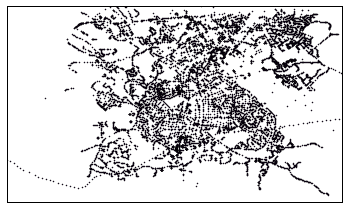

In [102]:
themap.plot(lons, lats, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=1            # marker size
            )

In [103]:
def pairs(nodes):
    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if i>j:
                yield node1, node2

In [104]:
for node, data in G.nodes_iter(data=True):
    if 'coords' in data:
        continue
    print(node)
    for pair in pairs(G.neighbors(node)):
        G.add_edge(*pair)
    G.remove_node(node)

532283427
534031027
532283456
532283475
534031039
2345402495
2345402496
2345402497
2345402498
2345402500
2345402501
2345402502
532283531
532283551
534031047
532283568
532283585
534031052
532283609
532283628
1351876846
1351876848
1351876851
532283646
532283668
532283681
532283706
3895510668
532283744
532283765
532283790
532283806
3883969264
532283882
532283906
3883707295
1323172368
3892707858
3892707859
3892707860
3892707861
3892707862
3892707863
3892707864
3892707865
3892707867
3892707868
3892707869
3892707870
3892707871
3892707872
3892707873
3892707874
3892707875
532283940
3892707877
3892707878
3892707879
3892707880
3892707881
3892707882
3892707883
3892707884
3892707885
3892707886
3892707887
3892707888
3892707889
3892707890
3892707891
3892707892
532283957
3892707894
3892707895
3892707896
3892707897
3892707898
3892707899
3892707900
3883707297
532283972
3643146849
532284037
532284048
3104789957
3104789960
532284083
3104789970
3884034860
532284184
532284205
3104789982
532284220
532284237

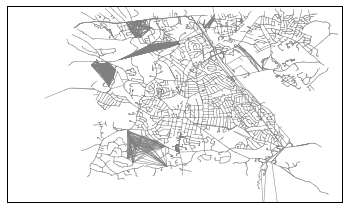

In [113]:
for node1, node2 in counter.G.edges_iter():
    x1, y1 = G.node[node1]['coords']
    x2, y2 = G.node[node2]['coords']
    themap.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)